In [1]:
import tensorflow as tf 
import numpy  as np 
import matplotlib.pyplot as plt 

print(tf.__version__)

2.0.0


#### 生成数据集

In [4]:
x_data = np.linspace(-1,1,100) # 使用等差数列的方式生成-1～1 100个点

np.random.seed(5) # 设置随机数种子
y_data = 2 * x_data + 1.0 + np.random.randn(*x_data.shape)*0.4

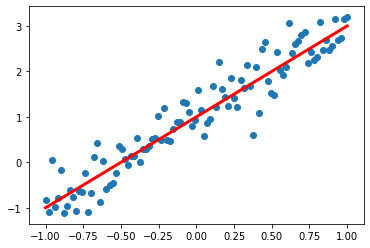

In [6]:
# 绘制出随机数据生成的散点图
plt.scatter(x_data,y_data)

plt.plot(x_data,1.0 + 2 * x_data,'r',linewidth=3)

#### 构建模型

In [17]:
def model(x,w,b):
    return tf.multiply(x,w) + b

In [18]:
w = tf.Variable(np.random.randn(),tf.float32)

b = tf.Variable(0.0,tf.float32)

In [8]:
# 定义损失函数
def loss(x,y,w,b):
    err = model(x,w,b) - y # 计算模型预测值和标签值的差异
    square_err = tf.square(err) # 计算平方
    return tf.reduce_mean(square_err)

In [9]:
# 设置训练的超参数
trainging_rpochs = 10 # 迭代次数
learning_rate = 0.01 # 学习率

In [13]:
# 定义梯度函数
def grad(x,y,w,b):
    with tf.GradientTape() as tape:
        loss_ = loss(x,y,w,b)
    return tape.gradient(loss_,[w,b])

Training Epoch: 01 Step: 010 loss=0.913182
Training Epoch: 01 Step: 020 loss=0.374734
Training Epoch: 01 Step: 030 loss=0.985269
Training Epoch: 01 Step: 040 loss=0.172147
Training Epoch: 01 Step: 050 loss=1.334744
Training Epoch: 01 Step: 060 loss=1.222054
Training Epoch: 01 Step: 070 loss=0.635587
Training Epoch: 01 Step: 080 loss=1.168982
Training Epoch: 01 Step: 090 loss=1.204156
Training Epoch: 01 Step: 100 loss=0.123009
Training Epoch: 02 Step: 110 loss=0.913182
Training Epoch: 02 Step: 120 loss=0.374734
Training Epoch: 02 Step: 130 loss=0.985269
Training Epoch: 02 Step: 140 loss=0.172147
Training Epoch: 02 Step: 150 loss=1.334744
Training Epoch: 02 Step: 160 loss=1.222054
Training Epoch: 02 Step: 170 loss=0.635587
Training Epoch: 02 Step: 180 loss=1.168982
Training Epoch: 02 Step: 190 loss=1.204156
Training Epoch: 02 Step: 200 loss=0.123009
Training Epoch: 03 Step: 210 loss=0.913182
Training Epoch: 03 Step: 220 loss=0.374734
Training Epoch: 03 Step: 230 loss=0.985269
Training Ep

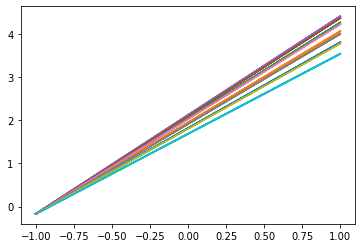

In [23]:
# 开始训练
step = 0 # 训练步数
loss_list = [] # 保存loss的值列表
display_step = 10

for epoch in range(trainging_rpochs):
    for xs,ys in zip(x_data,y_data):
        loss_ = loss(xs,ys,w,b)
        loss_list.append(loss_)

        data_w,data_b = grad(xs,ys,w,b)
        change_w = data_w * learning_rate
        change_b = data_w * learning_rate
        w.assign_sub(change_w)
        b.assign_sub(change_b)

        step = step + 1
        if step % display_step == 0 :
            print('Training Epoch:','%02d'%(epoch+1),'Step: %03d'%(step),'loss=%.6f'%(loss_))
            plt.plot(x_data,w.numpy()*x_data + b.numpy())

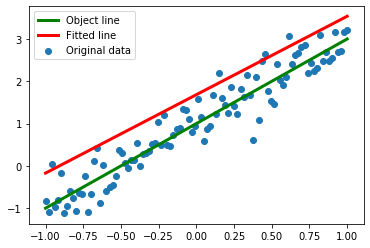

In [24]:
plt.scatter(x_data,y_data,label='Original data')
plt.plot(x_data,x_data * 2.0 + 1.0,label = 'Object line',color='g',linewidth=3)
plt.plot(x_data,x_data * w.numpy() + b.numpy(),label='Fitted line',color='r',linewidth=3 )
plt.legend(loc=2)

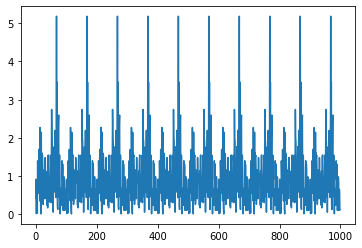

In [27]:
# 损失可视化
plt.plot(loss_list)

In [28]:
# 利用模型进行预测

x_test = 3.2

predict = model(x_test,w.numpy(),b.numpy())
print('预测值:%f'%predict)

target = 2 * x_test + 1.0
print("目标值：%f" % target)

预测值:7.615315
目标值：7.400000
